## 第一部分
先就已事先處理的'new_winequality'，進行模型的選擇。
選擇出兩個適合的模型進行下一步採樣比較。

In [2]:
import pandas as pd
train_df = pd.read_csv('../newdataset/new_diabetes.csv')

## 資料切割

In [3]:
from sklearn.model_selection import train_test_split

# 資料分割 def
def split_data(df, target_column, test_size=0.2, random_state=42):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_data(train_df, 'diabetes')

## 特徵縮放

In [4]:
from sklearn.preprocessing import MinMaxScaler

def apply_minmax_scaler(X_train, X_test):

    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler to the training data only
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert the scaled arrays back to DataFrame for better handling in pandas
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    return X_train_scaled, X_test_scaled

# 使用範例:
# X_train_scaled, X_test_scaled = apply_minmax_scaler(X_train, X_test)
X_train_scaled, X_test_scaled = apply_minmax_scaler(X_train, X_test)

### 模型選擇
Logistic Regression
Random Forest
SVM
KNN
Naive Bayes

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
def display_confusion_matrix(y_true, y_pred):

    # Generating the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Assuming binary classification for simplicity; adjust if needed for multi-class
    cm_df = pd.DataFrame(cm, 
                         index=['Actual Negative:0', 'Actual Positive:1'], 
                         columns=['Predicted Negative:0', 'Predicted Positive:1'])

    # Extracting TN, FP, FN, TP
    # TN, FP, FN, TP = cm.ravel()
    # print(f"True Negatives (TN): {TN}")
    # print(f"False Positives (FP): {FP}")
    # print(f"False Negatives (FN): {FN}")
    # print(f"True Positives (TP): {TP}")

    return cm_df

In [19]:
def train_evaluate_lr(X_train, X_test, y_train, y_test, model_name = 'logistic regression'):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    predictions = lr_model.predict(X_test)
    
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)
    
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = lr_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    print("ROC_AUC:", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'LR (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [20]:
def train_evaluate_rf(X_train, X_test, y_train, y_test, model_name = 'Random Forest'):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    print("ROC_AUC:", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'RF (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [21]:
def train_evaluate_svm(X_train, X_test, y_train, y_test, model_name = 'SVM'):
    # 初始化SVM模型  
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)  # 训练模型
    predictions = svm_model.predict(X_test)  # 进行预测
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    # 打印性能指标
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    print("ROC_AUC:", roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'SVM (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
def train_evaluate_nb(X_train, X_test, y_train, y_test, model_name = 'NB'):
    # 模型訓練
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    predictions = nb_model.predict(X_test)  # 进行预测
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    # 打印性能指标
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = nb_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    print("ROC_AUC:", roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'NB (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('NB ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier

def train_evaluate_knn (X_train, X_test, y_train, y_test, model_name='KNN'):
    # 創建 KNN 模型，選擇鄰居數量
    knn_model = KNeighborsClassifier()
    # 訓練模型
    knn_model.fit(X_train, y_train)
    # 預測
    predictions = knn_model.predict(X_test)
    
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    # 打印性能指标
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = knn_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    print("ROC_AUC:", roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'KNN (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

lr:
Accuracy: 0.9587
F1 Score: 0.9554685531468428
Precision: 0.8638613861386139
Recall: 0.6129976580796253
G-mean: 0.7794024716224104
MCC: 0.7074627460860325
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 18127                   165
Actual Positive:1                   661                  1047
ROC_AUC: 0.9612246987587771


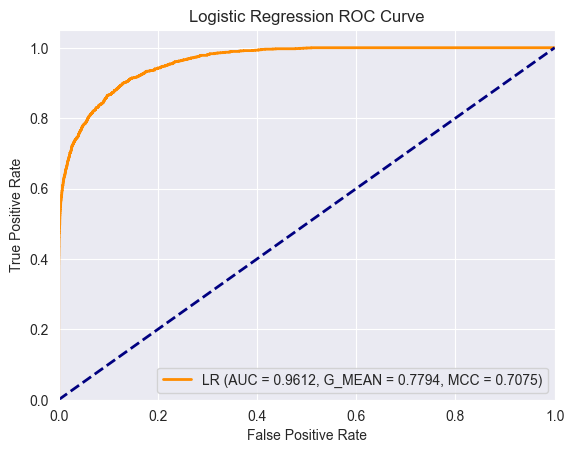

rf:
Accuracy: 0.96985
F1 Score: 0.96770774618471
Precision: 0.9416466826538769
Recall: 0.689695550351288
G-mean: 0.8288203077569357
MCC: 0.7913962141331919
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 18219                    73
Actual Positive:1                   530                  1178
ROC_AUC: 0.962623215841276


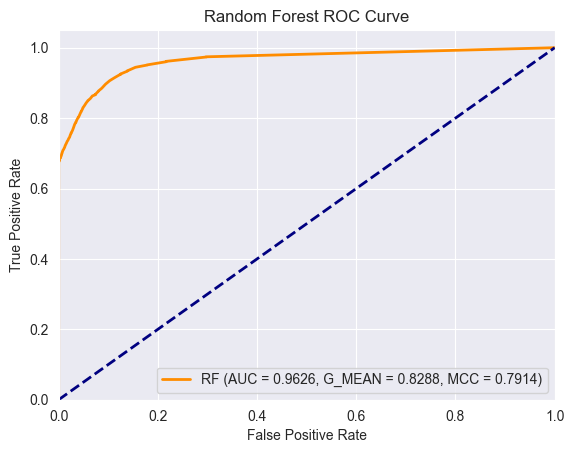

In [ ]:
# 輸出
train_lr = train_evaluate_lr(X_train_scaled, X_test_scaled, y_train, y_test, model_name='lr')
train_rf = train_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test, model_name='rf')
train_svm = train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, model_name='svm')
train_nb = train_evaluate_nb(X_train_scaled, X_test_scaled, y_train, y_test, model_name='nb')
train_knn = train_evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test, model_name='KNN')

### **五種模型統計**
**Diabetes選擇Logistic regression & Random Forest**

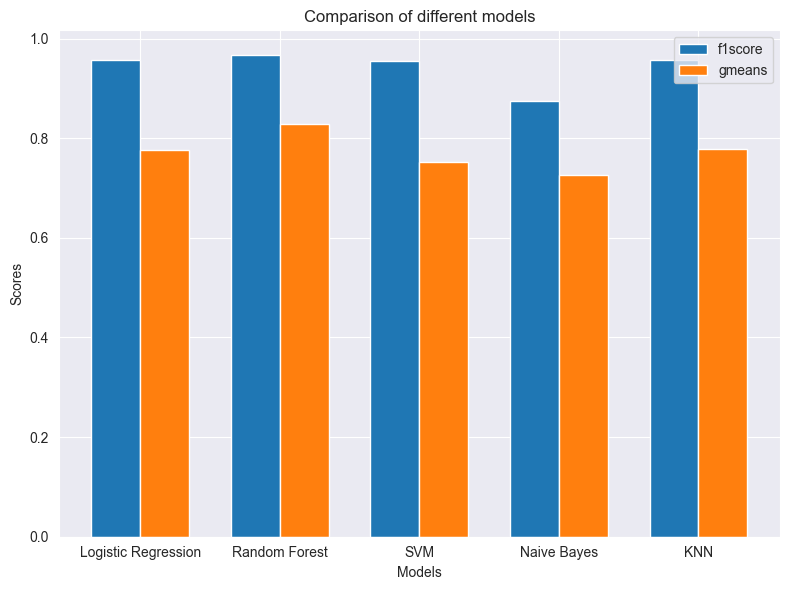

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的模型名称和评估指标
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN',]
f1score = [0.956, 0.968, 0.955, 0.875, 0.957]
roc_aucs = [0.961, 0.963, 0.959, 0.792, 0.905]  # 示例 ROC-AUC 值
gmeans = [0.777, 0.829, 0.752, 0.726, 0.778]  # 示例 Gini 系数
mccs = [0.709, 0.791, 0.707, 0.069, 0.723]  # 示例 MCC 值

# 比较 MCC 和 Gini 系数的函数
def compare_metrics(models, f1score, gmeans):
    ind = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(ind - width/2, f1score, width, label='f1score')
    rects2 = ax.bar(ind + width/2, gmeans, width, label='gmeans')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of different models')
    ax.set_xticks(ind)
    ax.set_xticklabels(models)
    ax.legend()

    fig.tight_layout()
    plt.show()

# 调用绘图函数
# 注意：您需要替换 fprs 和 tprs 为您的模型数据
# plot_roc_curves(fprs, tprs, models, roc_aucs)
compare_metrics(models, f1score, gmeans)

### Grid SearchCV


In [12]:
from sklearn.model_selection import GridSearchCV

# # 創建 Logistic Regression 模型
# lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
# 
# # 定義參數網格
# lr_param_grid = {
#     'C': [0.1, 1, 10, 100],  # 正則化強度的倒數
#     'penalty': ['l1', 'l2']  # 使用的懲罰
# }
# 
# # 設定 GridSearchCV
# grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, scoring='f1', verbose=2)
# 
# # 訓練模型
# grid_search.fit(X_train_scaled, y_train)
# 
# # 輸出最佳參數和最佳分數
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 
# # 使用最佳模型進行預測
# y_pred = grid_search.predict(X_test_scaled)
# 
# # 評估最終模型
# print(classification_report(y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, penalty=l1; total time=   1.8s
[CV] END ..................................C=0.1, penalty=l1; total time=   1.7s
[CV] END ..................................C=0.1, penalty=l1; total time=   2.1s
[CV] END ..................................C=0.1, penalty=l1; total time=   1.7s
[CV] END ..................................C=0.1, penalty=l1; total time=   1.9s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ....................................C=1, penalty=l1; total time=  11.0s
[CV] END ....................................C=1,

In [21]:
# # 創建模型
# rf_model = RandomForestClassifier()
# 
# # 定義參數網格
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# 
# # 使用網格搜索調整參數
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=2)
# grid_search.fit(X_train_scaled, y_train)
# 
# # 最佳參數和模型
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 
# # 使用最佳參數的模型進行預測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)
# print(classification_report(y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] 

In [83]:
# # 創建模型
# nb_model = MultinomialNB()
# 
# # 定義參數網格
# param_grid = {
#     'alpha': [0.01, 0.1, 1.0, 10.0],  # 不同的平滑參數
#     'fit_prior': [True, False]  # 是否學習先驗概率
# }
# 
# # 使用網格搜索調整參數
# grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_scaled, y_train)
# 
# # 最佳參數和模型
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 
# # 使用最佳參數的模型進行預測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)
# print(classification_report(y_test, y_pred, zero_division=0))

Best parameters: {'alpha': 0.1, 'fit_prior': False}
Best cross-validation score: 0.40
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     18292
           1       0.33      0.51      0.40      1708

    accuracy                           0.87     20000
   macro avg       0.64      0.70      0.66     20000
weighted avg       0.90      0.87      0.88     20000


In [109]:
# knn_model = KNeighborsClassifier()
# # 定義參數網格
# knn_param_grid = {
#     'n_neighbors': np.arange(1, 31), # 鄰居數量
#     'weights': ['uniform', 'distance'], # 權重類型
#     'metric': ['euclidean', 'manhattan'] # 距離度量
# }
# # 使用網格搜索調整參數
# grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_scaled, y_train)
# 
# # 最佳參數和模型
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 
# # 使用最佳參數的模型進行預測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)
# print(classification_report(y_test, y_pred, zero_division=0))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation score: 0.98
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.48      0.50      0.49       320
weighted avg       0.93      0.97      0.95       320
